# Changes in unemployment benefit duration: Looking back to predict what is coming
By Martijn de Leeuw (975139) and Jules Perry (435132)

## Motivation
 [The Dutch government announced](https://vcp.nl/symphony/extension/sm_richtext_redactor/getfile/?name=WW-factsheet_werknemers.pdf) a cutback of the unemployment benefits duration from a maximum of 38 months to a maximum of 24 months starting the first of January 2016. The duration will be lowered in steps starting the first of January 2016. The scientific literature on this topic recognizes multiple effects of a change in umeployment benefits duration. [Boeri and van Oers](http://press.princeton.edu/releases/m10142.pdf) recognize both postive and negative effects from a shortening of the unemployment benefits duration on unemployment rates. The job search effect and the taxation effect result in lower unemployment rates when the unemployment benefits duration is shortened. However, the job creation effect predicts an increase in unemployment rates due to the shortening of the unemployment duration effect (due to a decrease in consumption). In this study we examine the effects of a change in unemployment benefits duration in 2006 to predict the possible effects of the 2016 change. In 2006 the [duration of unemployment benefits](www.ru.nl/publish/pages/516298/nice_12103.pdf) in the Netherlands was lowered from a maximum of 5 years to a maximum of 38 months 

## Research Question
What is the effect of a shortening of unemployment benefits duration on unemployment rates? 

## Answer
The main result is that a lower duration of unemployment benefits has no signifcant effect on the unemployment rate.

## Method
Our model is an extension from the basic model [developed by Asif](http://search.proquest.com/openview/8001e7291e4800159fe911928ed4e35e/1?pq-origsite=gscholar&cbl=696344) . Asif found four factors that influence unemployment greatly:  growth of GDP, growth of population, exchange rate and inflation. Our current study focuses on the impact of a change in the unemployment benefits duration in the Netherlands. To this end the model is extended by adding the variable “Benefits” (BEN) to the basic model. To make the most of our analysis we used a log – legit regression model.  This leads to the following model: 






\begin{equation*}
LogUE=\beta0 + \beta1 GDP + \beta2 POPL + \beta3 ER + \beta4 INF + \beta5 BEN + \epsilon
\end{equation*}



The data on [GDP growth](http://statline.cbs.nl/Statweb/publication/?DM=SLNL&PA=82262ned&D1=0-187&D2=12-20&VW=T) and [population growth](http://statline.cbs.nl/Statweb/publication/?DM=SLNL&PA=37943ned&D1=6&D2=12-13%2c88%2c92%2c96-98%2c100%2c105%2c109%2c113%2c117%2c122%2c126%2c130%2c134%2c139%2c143%2c147%2c151%2c156%2c160%2c164%2c168%2c173%2c177%2c181-183%2c185%2c190%2c194%2c198%2c202%2c207%2c211%2c215%2c219%2c224%2c228%2c232%2c236%2c241%2c245%2c249%2c253%2c258%2c262%2c266-268%2c270%2c275%2c279%2c283%2c287%2c292%2c296%2c300%2c304%2c309%2c313%2c317%2c321%2c352-353%2c369-370&HDR=G1&STB=T&VW=T) are collected from Statistics Netherlands (CBS). CBS is a Dutch data collection institute that collects data for policy makers and researchers. For population growth real numbers are used to calculate the growth per period. For the quarterly inflation rate the database from the OECD ,[OECD.stat](http://stats.oecd.org/), is used. OECD is the organization for economic co-operation and development. The data on the unemployment rate are collected from [Eurostat](http://ec.europa.eu/eurostat), the economic database from the European Union. The data on the Dollar/Euro exchange rate also comes from Eurostat. The starting point is 2000, since that was the date that the euro was introduced as means of counting. The data on duration is extracted from [Delsen](www.ru.nl/publish/pages/516298/nice_12103.pdf). The duration of maximum unemployment benefits is given in weeks.



## Importing libraries
Below we import the libraries that will be used in this assignment.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import Series
from pandas import read_csv
from matplotlib import pyplot
from scipy import stats
from statsmodels.formula.api import ols

## [Data](https://github.com/julesperry/Assignments/blob/master/data.csv)
In this part we describe the data that is used to answer the research question. Below you can see the complete dataset that is used for the calculations. It also shows the datatyes, this is useful to check if calculations will be possible. 

In [88]:
data = pd.read_csv('data.csv')
print data.head(56)
print '\n Data Types:'
print data.dtypes

     Quarters   UE      POPL  GDP       BEN      ER  INF
0    1-1-2000  3.3  0.158945  5.3  260.0000  0.9865  1.9
1    4-1-2000  2.7  0.178228  4.8  260.0000  0.9332  2.1
2    7-1-2000  2.9  0.247728  3.9  260.0000  0.9052  2.4
3   10-1-2000  2.9  0.189003  3.0  260.0000  0.8683  2.8
4    1-1-2001  2.6  0.152511  2.7  260.0000  0.9232  3.9
5    4-1-2001  2.1  0.168929  2.7  260.0000  0.8725  4.4
6    7-1-2001  2.0  0.229679  2.0  260.0000  0.8903  4.3
7   10-1-2001  2.2  0.186267  1.2  260.0000  0.8959  4.0
8    1-1-2002  2.8  0.116980 -0.2  260.0000  0.8766  3.8
9    4-1-2002  2.6  0.114015  0.1  260.0000  0.9188  3.3
10   7-1-2002  2.7  0.184160  0.6  260.0000  0.9838  3.2
11  10-1-2002  2.9  0.125740 -0.1  260.0000  0.9994  2.8
12   1-1-2003  3.7  0.083520  0.9  260.0000  1.0731  2.4
13   4-1-2003  3.6  0.088670 -0.3  260.0000  1.1372  2.0
14   7-1-2003  3.6  0.126223 -0.1  260.0000  1.1248  2.1
15  10-1-2003  3.9  0.105240  0.7  260.0000  1.1890  1.9
16   1-1-2004  4.8  0.029063  1

Because our dataset consists of multiple observations over time, we need to tell python that we are working with time series. This is done below.

In [96]:
series = Series.from_csv('Data.csv', header = 0)
print(series.head()) 

Quarters
2000-01-01    3.3
2000-04-01    2.7
2000-07-01    2.9
2000-10-01    2.9
2001-01-01    2.6
Name: UE, dtype: float64


In [97]:
series = read_csv('data.csv', header=0, parse_dates=[0], index_col=0, squeeze=False)
print(type(series))
print(series.head(20))

<class 'pandas.core.frame.DataFrame'>
             UE      POPL  GDP    BEN      ER  INF
Quarters                                          
2000-01-01  3.3  0.158945  5.3  260.0  0.9865  1.9
2000-04-01  2.7  0.178228  4.8  260.0  0.9332  2.1
2000-07-01  2.9  0.247728  3.9  260.0  0.9052  2.4
2000-10-01  2.9  0.189003  3.0  260.0  0.8683  2.8
2001-01-01  2.6  0.152511  2.7  260.0  0.9232  3.9
2001-04-01  2.1  0.168929  2.7  260.0  0.8725  4.4
2001-07-01  2.0  0.229679  2.0  260.0  0.8903  4.3
2001-10-01  2.2  0.186267  1.2  260.0  0.8959  4.0
2002-01-01  2.8  0.116980 -0.2  260.0  0.8766  3.8
2002-04-01  2.6  0.114015  0.1  260.0  0.9188  3.3
2002-07-01  2.7  0.184160  0.6  260.0  0.9838  3.2
2002-10-01  2.9  0.125740 -0.1  260.0  0.9994  2.8
2003-01-01  3.7  0.083520  0.9  260.0  1.0731  2.4
2003-04-01  3.6  0.088670 -0.3  260.0  1.1372  2.0
2003-07-01  3.6  0.126223 -0.1  260.0  1.1248  2.1
2003-10-01  3.9  0.105240  0.7  260.0  1.1890  1.9
2004-01-01  4.8  0.029063  1.5  260.0  1.249

## Descriptive statistics
To be able to do a clear analysis of the problem, it is good to first have a clear view on the data that is used. Therefor we have a brief look at our data.
Number of observations:

In [51]:
print(series.size)

336


The mean and standard deviations of the variables:

In [52]:
print(series.describe())

              UE       POPL        GDP         BEN         ER        INF
count  56.000000  56.000000  56.000000   56.000000  56.000000  56.000000
mean    4.062500   0.105558   1.266071  205.523829   1.228832   2.125000
std     1.379534   0.059768   2.211152   47.604705   0.187051   0.901968
min     2.000000  -0.000735  -4.900000  164.666700   0.868300   0.300000
25%     2.900000   0.057305  -0.125000  164.666700   1.134100   1.575000
50%     3.850000   0.102474   1.650000  164.666700   1.285050   2.000000
75%     4.800000   0.154119   2.850000  260.000000   1.350725   2.625000
max     7.500000   0.247728   5.300000  260.000000   1.562200   4.400000


The variable that is the most important for the analysis is the unemployment rate. Figure 1 shows the unemployment rate in The Netherlands between 2000 and 2013. The vertical line shows the [time](www.ru.nl/publish/pages/516298/nice_12103.pdf) at which the duration of the unemployment benefits was lowered from 260 to 164.67 weeks. The graph shows that there is a change in pattern after the change. This gives us reason to further investigate the effect.

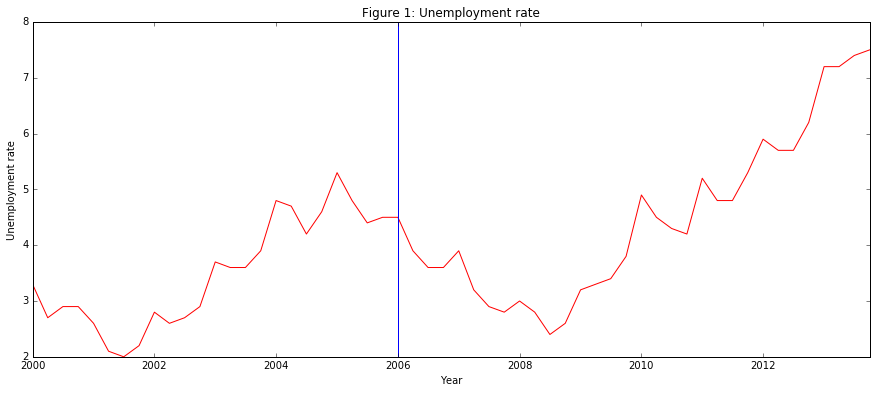

In [113]:
series = Series.from_csv('data.csv', header=0)
pyplot.plot(series, 'r')
plt.ylabel('Unemployment rate')
plt.xlabel('Year')
plt.title('Figure 1: Unemployment rate')
plt.axvline(x='2006-01-01')
pyplot.show()

## Analysis
To investigate the effect of the duration of unemployment beneifts on the unemploymentrate we need to do a multiple linear regression. The main variable that is of interest to us is BEN.

In [114]:
 
data = pd.read_csv('data.csv')
INFL = data['INF']
model = ols('np.log(UE) ~ GDP + POPL + ER + BEN + INFL', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             np.log(UE)   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     6.843
Date:                Thu, 26 Jan 2017   Prob (F-statistic):           6.22e-05
Time:                        13:23:06   Log-Likelihood:                -2.3034
No. Observations:                  56   AIC:                             16.61
Df Residuals:                      50   BIC:                             28.76
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.5857      0.724      2.190      0.0

The results above show that the effect of the unemployment benefit duration (BEN) on the unemployment rate is not statistically significant. 

## Conclusion
Based on our study of the effects from a policy change in 2006 in the Netherlands we can conclude that a change in the unemployment benefit duration has no statistically significant effect on the unepmloyment rate. We have no reason to believe that the policy change that was put in to practice in 2016 will have any effect on the unemployment rate. 
